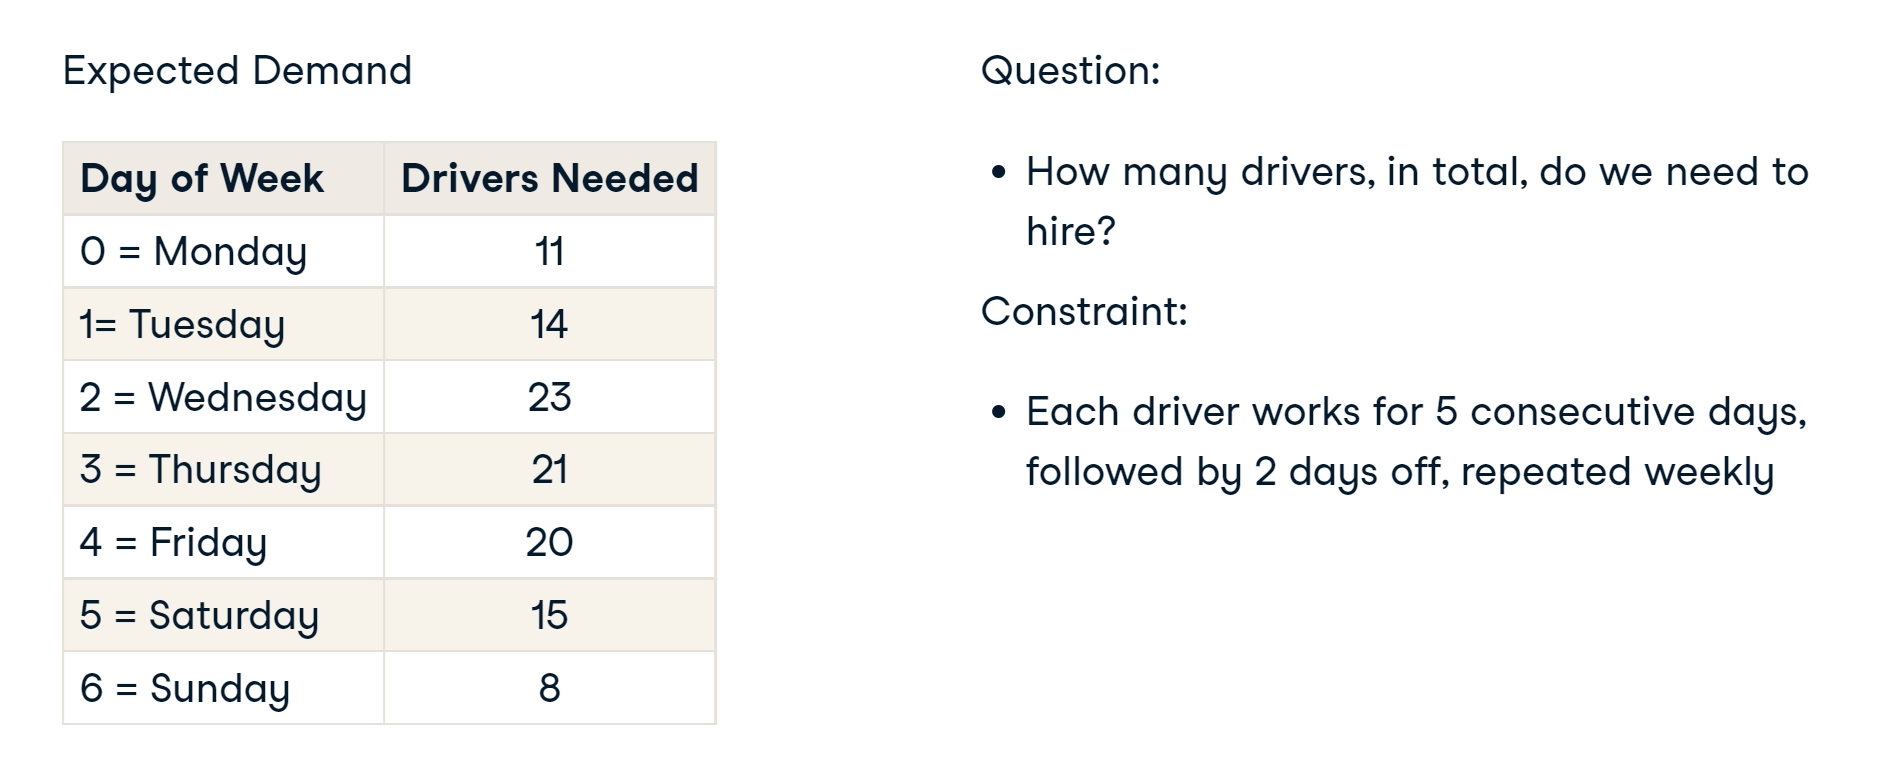

A company needs to hire drivers to delivery goods. <br>
Given the demand for the number of drivers needed for each day of the week. <br>
The objective is to minimize the total number of drivers needed in a given week.<br>


---






Import **PuLP** Library

In [4]:
#!pip install pulp
from pulp import *

Initialize **Model**

In [7]:
model = LpProblem('Scheduling_Problem',LpMinimize)

Define **Decision Variables** 

In [8]:
days = list(range(7))
x = LpVariable.dicts('staff_',days,lowBound=0,cat='Integer')

Define **Objective Function**

In [9]:
model += lpSum([x[i] for i in days])

Define **Constrains**

In [10]:
model += x[0] + x[3] + x[4] + x[5] + x[6] >= 11
model += x[0] + x[1] + x[4] + x[5] + x[6] >= 14
model += x[0] + x[1] + x[2] + x[5] + x[6] >= 23
model += x[0] + x[1] + x[2] + x[3] + x[6] >= 21
model += x[0] + x[1] + x[2] + x[3] + x[4] >= 20
model += x[1] + x[2] + x[3] + x[4] + x[5] >= 15
model += x[2] + x[3] + x[4] + x[5] + x[6] >= 8

Formulated **Linear Programming (LP) Problem**

In [11]:
print(model)

Scheduling_Problem:
MINIMIZE
1*staff__0 + 1*staff__1 + 1*staff__2 + 1*staff__3 + 1*staff__4 + 1*staff__5 + 1*staff__6 + 0
SUBJECT TO
_C1: staff__0 + staff__3 + staff__4 + staff__5 + staff__6 >= 11

_C2: staff__0 + staff__1 + staff__4 + staff__5 + staff__6 >= 14

_C3: staff__0 + staff__1 + staff__2 + staff__5 + staff__6 >= 23

_C4: staff__0 + staff__1 + staff__2 + staff__3 + staff__6 >= 21

_C5: staff__0 + staff__1 + staff__2 + staff__3 + staff__4 >= 20

_C6: staff__1 + staff__2 + staff__3 + staff__4 + staff__5 >= 15

_C7: staff__2 + staff__3 + staff__4 + staff__5 + staff__6 >= 8

VARIABLES
0 <= staff__0 Integer
0 <= staff__1 Integer
0 <= staff__2 Integer
0 <= staff__3 Integer
0 <= staff__4 Integer
0 <= staff__5 Integer
0 <= staff__6 Integer



Solving **Model**


In [12]:
model.solve()

1

Showing **Model Results**

In [13]:
print('Status : ',LpStatus[model.status])
print('')

for v in model.variables():
  print(v.name,'=',v.varValue)

print('')
print('Optimal (minimum) number of drivers needed : ',value(model.objective))

Status :  Optimal

staff__0 = 8.0
staff__1 = 8.0
staff__2 = 5.0
staff__3 = 1.0
staff__4 = 0.0
staff__5 = 1.0
staff__6 = 1.0

Optimal (minimum) number of drivers needed :  24.0
